<center>
    <h1>Open Programme - Text Classification</h1>   
    <img width="550px" src="https://www.sammurize.com/images/assets/ils_14.svg">
</center> 

# Introduction
The purpose of this notebook is to present the results achieved during the Open Programme Challenge, which is part of the semester seven specialization.
Besides this notebook, there is a simple Streamlit application written in Python that I have created to display sentiment analysis on user's input text. I will leave a screenshot below of how it looks like.

<img width="900px" src="https://user-images.githubusercontent.com/64732465/201096010-f19b93bb-aadf-4d6a-9f38-5149ce478fef.png">

# Open Programme Objective
The main goal of this Open Programme Challenge for me was to gain more knowledge, which I lacked. Besides that, my objective was to create a sentiment analysis model and, later, an application which visualizes the sentiment. Also, I decided to use PyTorch for a change and try out how it works. Moreover, I decided to use transformers to enrich my knowledge and experience. 

# Project Timeline
Below, you can take a look at the project timeline.

<img width="600px" src="https://user-images.githubusercontent.com/64732465/201093466-abb31ee2-51d6-4966-9976-fd2fe606d0c6.jpg">

# Steps

1. Get to know BERT
2. Environment Set-up
3. Import the Dataset
4. Pre-process the data
5. Split the Dataset in train and validate
6. Training the Model
7. Make Predictions
8. Conclusion

# Table of Contents

>[Introduction](#updateTitle=true&folderId=18DziltBS0G5SmXAHcFY1Cb1Hcg9tFMqi&scrollTo=XMqQF1HG3cgo)

>[Types of Text Summarization](#updateTitle=true&folderId=18DziltBS0G5SmXAHcFY1Cb1Hcg9tFMqi&scrollTo=XMqQF1HG3cgo)

>[Why Text Summarization](#updateTitle=true&folderId=18DziltBS0G5SmXAHcFY1Cb1Hcg9tFMqi&scrollTo=XMqQF1HG3cgo)

>[Use Cases of Text Summarization](#updateTitle=true&folderId=18DziltBS0G5SmXAHcFY1Cb1Hcg9tFMqi&scrollTo=XMqQF1HG3cgo)

>[Steps](#updateTitle=true&folderId=18DziltBS0G5SmXAHcFY1Cb1Hcg9tFMqi&scrollTo=XMqQF1HG3cgo)

>[The Dataset](#updateTitle=true&folderId=18DziltBS0G5SmXAHcFY1Cb1Hcg9tFMqi&scrollTo=oahjsPEsg9Px)

>[Preprocessing](#updateTitle=true&folderId=18DziltBS0G5SmXAHcFY1Cb1Hcg9tFMqi&scrollTo=xxpGPJMAh_UR)

>[Split the data](#updateTitle=true&folderId=18DziltBS0G5SmXAHcFY1Cb1Hcg9tFMqi&scrollTo=KM9cgZs_v-th)

>[Training the Model](#updateTitle=true&folderId=18DziltBS0G5SmXAHcFY1Cb1Hcg9tFMqi&scrollTo=2bKgVhlZwkC7)

>[Predicting](#updateTitle=true&folderId=18DziltBS0G5SmXAHcFY1Cb1Hcg9tFMqi&scrollTo=p7t9F3JQ2FJf)

>[Conclusion](#updateTitle=true&folderId=18DziltBS0G5SmXAHcFY1Cb1Hcg9tFMqi&scrollTo=EziDVKCRj4Ov)



In [3]:
# !pip install transformers

In [19]:
# import dependencies
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split

from transformers import BertTokenizer, BertForSequenceClassification

import pandas as pd
import numpy as np

from tabulate import tabulate # https://pypi.org/project/tabulate/
from tqdm import trange
import random

# The Dataset

I will be using the SMS Spam Collection Data Set from the UCI Machine Learning Repository. The data consists of a text file with a set of SMS messages labeled as either spam or ham.

    Download the dataset as a zip folder:

In [5]:
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'

--2022-11-10 12:23:57--  https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203415 (199K) [application/x-httpd-php]
Saving to: ‘smsspamcollection.zip’

smsspamcollection.z 100%[===================>] 198.65K   325KB/s    in 0.6s    

2022-11-10 12:23:59 (325 KB/s) - ‘smsspamcollection.zip’ saved [203415/203415]



    Unpack the folder:

In [6]:
!unzip -o smsspamcollection.zip

Archive:  smsspamcollection.zip
  inflating: SMSSpamCollection       
  inflating: readme                  


    Inspect the first rows of the data file:

In [7]:
!head -10 SMSSpamCollection

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
ham	Ok lar... Joking wif u oni...
spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
ham	U dun say so early hor... U c already then say...
ham	Nah I don't think he goes to usf, he lives around here though
spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
ham	Even my brother is not like to speak with me. They treat me like aids patent.
ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
spam	H

    For each line, the label is followed by a tab space and the raw text message. I will process the file to get a pandas.DataFrame object:

In [8]:
file_path = '/content/SMSSpamCollection'
df = pd.DataFrame({'label':int(), 'text':str()}, index = [])
with open(file_path) as f:
  for line in f.readlines():
    split = line.split('\t')
    df = df.append({'label': 1 if split[0] == 'spam' else 0,
                    'text': split[1]},
                    ignore_index = True)
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...\n
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


    Extract the text and the label values:

In [9]:
text = df.text.values
labels = df.label.values

#  Preprocessing

    I will need to preprocess the text source before feeding it to BERT model. To do so, I will download the BertTokenizer:

In [10]:
tokenizer = BertTokenizer.from_pretrained(
    'bert-base-uncased',
    do_lower_case = True
    )

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

    Let's observe how the tokenizer can split a random sentence into word-level tokens and map them to their respective IDs in the BERT vocabulary:

In [11]:
def print_rand_sentence():
  # displays the tokens and respective IDs of a random text sample
  index = random.randint(0, len(text)-1)
  table = np.array([tokenizer.tokenize(text[index]), 
                    tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text[index]))]).T
  print(tabulate(table,
                 headers = ['Tokens', 'Token IDs'],
                 tablefmt = 'fancy_grid'))

print_rand_sentence()

╒══════════╤═════════════╕
│ Tokens   │   Token IDs │
╞══════════╪═════════════╡
│ urgent   │       13661 │
├──────────┼─────────────┤
│ !        │         999 │
├──────────┼─────────────┤
│ your     │        2115 │
├──────────┼─────────────┤
│ mobile   │        4684 │
├──────────┼─────────────┤
│ number   │        2193 │
├──────────┼─────────────┤
│ has      │        2038 │
├──────────┼─────────────┤
│ been     │        2042 │
├──────────┼─────────────┤
│ awarded  │        3018 │
├──────────┼─────────────┤
│ with     │        2007 │
├──────────┼─────────────┤
│ a        │        1037 │
├──────────┼─────────────┤
│ £2       │       21853 │
├──────────┼─────────────┤
│ ##00     │        8889 │
├──────────┼─────────────┤
│ ##0      │        2692 │
├──────────┼─────────────┤
│ bonus    │        6781 │
├──────────┼─────────────┤
│ caller   │       20587 │
├──────────┼─────────────┤
│ prize    │        3396 │
├──────────┼─────────────┤
│ .        │        1012 │
├──────────┼─────────────┤
│

BERT requires the following preprocessing steps:

    Add special tokens:
    - [CLS]: at the beginning of each sentence (ID 101)
    - [SEP]: at the end of each sentence (ID 102)
    Make sentences of the same length:
    - This is achieved by padding, i.e. adding values of convenience to shorter sequences to match the desired length. Longer sequences are truncated.
    - The padding ([PAD]) tokens have ID 0.
    - The maximum sequence length allowed is of 512 tokens.
    Create an attention mask:
    - List of 0/1 indicating whether the model should consider the tokens or not when learning their contextual representation. We expect [PAD] tokens to have value 0.


The needed steps can be performed by using the tokenizer.encode_plus method. When called, it returns a transformers.tokenization.tokenization-utils_base.BatchEncoding object with the following fields:

    input_ids: list of token IDs.
    token_type_ids: list of token type IDs.
    attention_mask: list of 0/1 indicating which tokens should be considered by the model (return_attention_mask = True).

As we choose max_length = 32, longer sentences will be truncated, while shorter sentences will be populated with [PAD] tokens (id: 0) until they reach the desired length.

Note: the idea of using the tokenizer.encode_plus method (plus the code for it) was borrowed from this post: BERT Fine-Tuning Tutorial with PyTorch by Chris McCormick and Nick Ryan.

In [12]:
token_id = []
attention_masks = []

def preprocessing(input_text, tokenizer):
  '''
  Returns <class transformers.tokenization_utils_base.BatchEncoding> with the following fields:
    - input_ids: list of token ids
    - token_type_ids: list of token type ids
    - attention_mask: list of indices (0,1) specifying which tokens should considered by the model (return_attention_mask = True).
  '''
  return tokenizer.encode_plus(
                        input_text,
                        add_special_tokens = True,
                        max_length = 32,
                        pad_to_max_length = True,
                        return_attention_mask = True,
                        return_tensors = 'pt'
                   )


for sample in text:
  encoding_dict = preprocessing(sample, tokenizer)
  token_id.append(encoding_dict['input_ids']) 
  attention_masks.append(encoding_dict['attention_mask'])


token_id = torch.cat(token_id, dim = 0)
attention_masks = torch.cat(attention_masks, dim = 0)
labels = torch.tensor(labels)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2310: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [13]:
token_id[1]

tensor([  101,  7929,  2474,  2099,  1012,  1012,  1012, 16644, 15536,  2546,
         1057,  2006,  2072,  1012,  1012,  1012,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0])

  We can observe the token IDs for a text sample and recognize the presence of the special tokens [CLS] and [SEP], as well as the padding [PAD] up to the desired max_length:

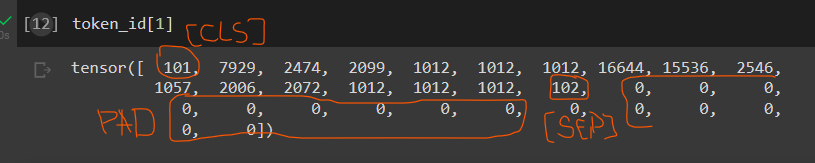

In [14]:
def print_rand_sentence_encoding():
  # displays tokens, token IDs and attention mask of a random text sample
  index = random.randint(0, len(text) - 1)
  tokens = tokenizer.tokenize(tokenizer.decode(token_id[index]))
  token_ids = [i.numpy() for i in token_id[index]]
  attention = [i.numpy() for i in attention_masks[index]]

  table = np.array([tokens, token_ids, attention]).T
  print(tabulate(table, 
                 headers = ['Tokens', 'Token IDs', 'Attention Mask'],
                 tablefmt = 'fancy_grid'))

print_rand_sentence_encoding()

╒══════════╤═════════════╤══════════════════╕
│ Tokens   │   Token IDs │   Attention Mask │
╞══════════╪═════════════╪══════════════════╡
│ [CLS]    │         101 │                1 │
├──────────┼─────────────┼──────────────────┤
│ it       │        2009 │                1 │
├──────────┼─────────────┼──────────────────┤
│ shall    │        4618 │                1 │
├──────────┼─────────────┼──────────────────┤
│ be       │        2022 │                1 │
├──────────┼─────────────┼──────────────────┤
│ fine     │        2986 │                1 │
├──────────┼─────────────┼──────────────────┤
│ .        │        1012 │                1 │
├──────────┼─────────────┼──────────────────┤
│ i        │        1045 │                1 │
├──────────┼─────────────┼──────────────────┤
│ have     │        2031 │                1 │
├──────────┼─────────────┼──────────────────┤
│ ava      │       10927 │                1 │
├──────────┼─────────────┼──────────────────┤
│ ##lar    │        8017 │        

Note: BERT is a model with absolute position embeddings, so it is usually advised to pad the inputs on the right (end of the sequence) rather than the left (beginning of the sequence). In our case, tokenizer.encode_plus takes care of the needed preprocessing.

# Split the data

I will split the dataset into train (80%) and validation (20%) sets, and wrap them around a torch.utils.data.DataLoader object. With its intuitive syntax, DataLoader provides an iterable over the given dataset.

In [15]:
val_ratio = 0.2
# recommended batch size: 16, 32. See: https://arxiv.org/pdf/1810.04805.pdf
batch_size = 16

# indices of the train and validation splits stratified by labels
train_idx, val_idx = train_test_split(
    np.arange(len(labels)),
    test_size = val_ratio,
    shuffle = True,
    stratify = labels)

# train and validation sets
train_set = TensorDataset(token_id[train_idx], 
                          attention_masks[train_idx], 
                          labels[train_idx])

val_set = TensorDataset(token_id[val_idx], 
                        attention_masks[val_idx], 
                        labels[val_idx])

# prepare DataLoader
train_dataloader = DataLoader(
            train_set,
            sampler = RandomSampler(train_set),
            batch_size = batch_size
        )

validation_dataloader = DataLoader(
            val_set,
            sampler = SequentialSampler(val_set),
            batch_size = batch_size
        )

# Training the Model

It is time for the fine-tuning task:

    Select hyperparameters based on the recommendations from the BERT paper:

    The optimal hyperparameter values are task-specific, but we found the following range of possible values to work well across all tasks:

    - Batch size: 16, 32

    - Learning rate (Adam): 5e-5, 3e-5, 2e-5

    - Number of epochs: 2, 3, 4

    Define some functions to assess validation metrics (accuracy, precision, recall and specificity) during the training process:

<img width="600px" src="https://miro.medium.com/max/1100/1*qX3sjK1ghynPrbL2tMRQNQ.png">

In [16]:
def b_tp(preds, labels):
  # returns True Positives (TP): count of correct predictions of actual class 1
  return sum([preds == labels and preds == 1 for preds, labels in zip(preds, labels)])

def b_fp(preds, labels):
  # returns False Positives (FP): count of wrong predictions of actual class 1
  return sum([preds != labels and preds == 1 for preds, labels in zip(preds, labels)])

def b_tn(preds, labels):
  # returns True Negatives (TN): count of correct predictions of actual class 0
  return sum([preds == labels and preds == 0 for preds, labels in zip(preds, labels)])

def b_fn(preds, labels):
  # returns False Negatives (FN): count of wrong predictions of actual class 0
  return sum([preds != labels and preds == 0 for preds, labels in zip(preds, labels)])

def b_metrics(preds, labels):
  '''
  Returns the following metrics:
    - accuracy    = (TP + TN) / N
    - precision   = TP / (TP + FP)
    - recall      = TP / (TP + FN)
    - specificity = TN / (TN + FP)
  '''
  preds = np.argmax(preds, axis = 1).flatten()
  labels = labels.flatten()
  tp = b_tp(preds, labels)
  tn = b_tn(preds, labels)
  fp = b_fp(preds, labels)
  fn = b_fn(preds, labels)
  b_accuracy = (tp + tn) / len(labels)
  b_precision = tp / (tp + fp) if (tp + fp) > 0 else 'nan'
  b_recall = tp / (tp + fn) if (tp + fn) > 0 else 'nan'
  b_specificity = tn / (tn + fp) if (tn + fp) > 0 else 'nan'
  return b_accuracy, b_precision, b_recall, b_specificity

Download transformers.BertForSequenceClassification, which is a BERT model with a linear layer for sentence classification (or regression) on top of the pooled output:

In [17]:
# Load the BertForSequenceClassification model
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels = 2,
    output_attentions = False,
    output_hidden_states = False,
)

# Recommended learning rates (Adam): 5e-5, 3e-5, 2e-5. See: https://arxiv.org/pdf/1810.04805.pdf
optimizer = torch.optim.AdamW(model.parameters(), 
                              lr = 5e-5,
                              eps = 1e-08
                              )

# Run on GPU
model.cuda()

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

Note: it is preferable to run this notebook in the presence of GPU. In order to execute it on CPU, we should comment model.cuda() in the above snippet to avoid a runtime error.

    Perform the training procedure:

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# recommended number of epochs: 2, 3, 4. See: https://arxiv.org/pdf/1810.04805.pdf
epochs = 2

for _ in trange(epochs, desc = 'Epoch'):
    
    # ========== training ==========
    
    # set model to training mode
    model.train()
    
    # tracking variables
    tr_loss = 0
    nb_tr_examples, nb_tr_steps = 0, 0

    for step, batch in enumerate(train_dataloader):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        optimizer.zero_grad()
        # forward pass
        train_output = model(b_input_ids, 
                             token_type_ids = None, 
                             attention_mask = b_input_mask, 
                             labels = b_labels)
        # backward pass
        train_output.loss.backward()
        optimizer.step()
        # update tracking variables
        tr_loss += train_output.loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1

    # ========== validation ==========

    # set model to evaluation mode
    model.eval()

    # tracking variables 
    val_accuracy = []
    val_precision = []
    val_recall = []
    val_specificity = []

    for batch in validation_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        with torch.no_grad():
          # forward pass
          eval_output = model(b_input_ids, 
                              token_type_ids = None, 
                              attention_mask = b_input_mask)
        logits = eval_output.logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        # calculate validation metrics
        b_accuracy, b_precision, b_recall, b_specificity = b_metrics(logits, label_ids)
        val_accuracy.append(b_accuracy)
        # update precision only when (tp + fp) !=0; ignore nan
        if b_precision != 'nan': val_precision.append(b_precision)
        # update recall only when (tp + fn) !=0; ignore nan
        if b_recall != 'nan': val_recall.append(b_recall)
        # update specificity only when (tn + fp) !=0; ignore nan
        if b_specificity != 'nan': val_specificity.append(b_specificity)

    print('\n\t - Train loss: {:.4f}'.format(tr_loss / nb_tr_steps))
    print('\t - Validation Accuracy: {:.4f}'.format(sum(val_accuracy)/len(val_accuracy)))
    print('\t - Validation Precision: {:.4f}'.format(sum(val_precision)/len(val_precision)) if len(val_precision)>0 else '\t - Validation Precision: NaN')
    print('\t - Validation Recall: {:.4f}'.format(sum(val_recall)/len(val_recall)) if len(val_recall)>0 else '\t - Validation Recall: NaN')
    print('\t - Validation Specificity: {:.4f}\n'.format(sum(val_specificity)/len(val_specificity)) if len(val_specificity)>0 else '\t - Validation Specificity: NaN')

Epoch:  50%|█████     | 1/2 [00:33<00:33, 33.46s/it]


	 - Train loss: 0.0347
	 - Validation Accuracy: 0.9848
	 - Validation Precision: 0.9788
	 - Validation Recall: 0.9033
	 - Validation Specificity: 0.9969



Epoch: 100%|██████████| 2/2 [01:08<00:00, 34.07s/it]


	 - Train loss: 0.0140
	 - Validation Accuracy: 0.9857
	 - Validation Precision: 0.9844
	 - Validation Recall: 0.9162
	 - Validation Specificity: 0.9980



# Predicting

After a training procedure, it is a good practice to assess the model’s performances on a test set. For the purpose of this example, I will simply predict the class (ham vs. spam) of a new text sample:

In [21]:
new_sentence = 'WINNER!! As a valued network customer you have been selected to receive £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'

# I need Token IDs and Attention Mask for inference on the new sentence
test_ids = []
test_attention_mask = []

# apply the tokenizer
encoding = preprocessing(new_sentence, tokenizer)

# extract IDs and Attention Mask
test_ids.append(encoding['input_ids'])
test_attention_mask.append(encoding['attention_mask'])
test_ids = torch.cat(test_ids, dim = 0)
test_attention_mask = torch.cat(test_attention_mask, dim = 0)

# forward pass, calculate logit predictions
with torch.no_grad():
  output = model(test_ids.to(device), token_type_ids = None, attention_mask = test_attention_mask.to(device))

prediction = 'Spam' if np.argmax(output.logits.cpu().numpy()).flatten().item() == 1 else 'Ham'

print('Input Sentence: ', new_sentence)
print('Predicted Class: ', prediction)

Input Sentence:  WINNER!! As a valued network customer you have been selected to receive £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
Predicted Class:  Spam


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2310: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


# Conclusion

In this Colab Notebook, I performed the fine-tuning of BERT for a classification task.

Deep Learning frameworks are already equipped with implementations of popular NLP transformers like BERT. TensorFlow and PyTorch provide a set of pre-trained models as well as intuitive APIs to ease their adoption and perform fine-tuning tasks. Moreover, AI communities like Hugging Face make possible to access large model hubs and straightforward interfaces to work with.

<br>
<br>

References:

Devlin, Jacob; Chang, Ming-Wei; Lee, Kenton; Toutanova, Kristina, “BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding”, 2018, https://arxiv.org/pdf/1810.04805.pdf 

Chris McCormick and Nick Ryan. (2019, July 22). BERT Fine-Tuning Tutorial with PyTorch. Retrieved from https://mccormickml.com/2019/07/22/BERT-fine-tuning/

https://huggingface.co/

https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#preparing-your-data-for-training-with-dataloaders

